## Part - 1
### Exploratory Data Analysis

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv('Downloads/superstore_dataset2011-2015.csv', encoding= 'unicode_escape')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [145]:
# To view the datatypes of each column
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [148]:
df.shape

(51290, 24)

In [146]:
# To view all the columns
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [ ]:
## Top 10 customers

In [90]:
df_cust = df.groupby(['Customer Name']).sum().sort_values('Sales',ascending = False).head(10)
df_cust = df_cust['Sales'].round(0)
df_cust = df_cust.reset_index()
df_cust

,Customer Name,Sales
0,Tom Ashbrook,40488.0
1,Tamara Chand,37457.0
2,Greg Tran,35551.0
3,Christopher Conant,35187.0
4,Sean Miller,35171.0
5,Bart Watters,32310.0
6,Natalie Fritzler,31781.0
7,Fred Hopkins,30401.0
8,Jane Waco,30288.0
9,Hunter Lopez,30244.0


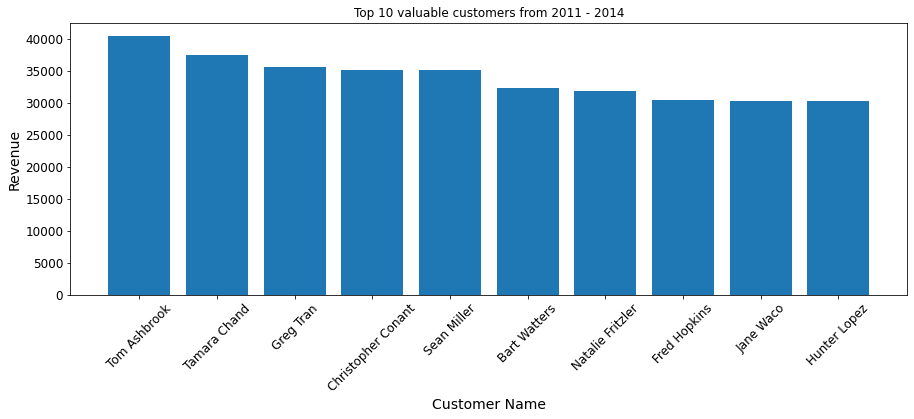

In [91]:
plt.figure(figsize = (15,5))
plt.bar(df_cust['Customer Name'],df_cust['Sales'])
plt.title('Top 10 valuable customers from 2011 - 2014')
plt.xlabel('Customer Name')
plt.ylabel('Revenue')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
## Top Product Categories which generated the sales 

In [92]:

df_cat = df.groupby(['Category']).sum().sort_values('Sales',ascending = False)
df_cat = df_cat['Sales'].round(0)
df_cat = df_cat.reset_index()
df_cat

,Category,Sales
0,Technology,4744557.0
1,Furniture,4110874.0
2,Office Supplies,3787070.0


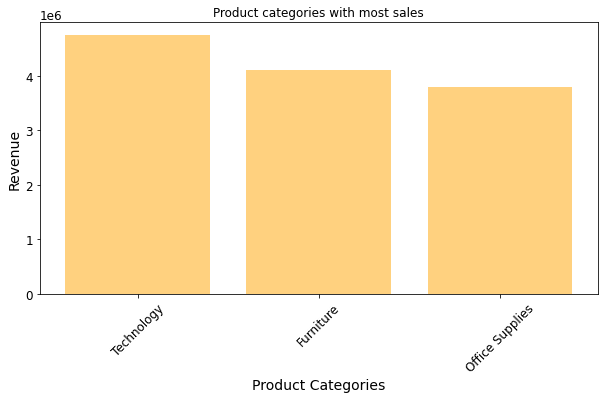

In [93]:
# A plot to view the 
plt.figure(figsize = (10,5))
plt.bar(df_cat['Category'],df_cat['Sales'],color = 'orange',alpha = 0.5)
plt.title('Product categories with most sales')
plt.xlabel('Product Categories')
plt.ylabel('Revenue')
plt.xticks(rotation = 45)
plt.show()

In [94]:
# Further decomposing the sales on Category and Sub-Category
df_subcat = df.groupby(['Category','Sub-Category']).sum()
df_subcat = df_subcat['Sales']
df_subcat = df_subcat.reset_index()
df_subcat

,Category,Sub-Category,Sales
0,Furniture,Bookcases,1.466572e+06
1,Furniture,Chairs,1.501682e+06
2,Furniture,Furnishings,3.855783e+05
3,Furniture,Tables,7.570419e+05
4,Office Supplies,Appliances,1.011064e+06
5,Office Supplies,Art,3.720920e+05
6,Office Supplies,Binders,4.619115e+05
7,Office Supplies,Envelopes,1.709043e+05
8,Office Supplies,Fasteners,8.324232e+04
9,Office Supplies,Labels,7.340403e+04


In [95]:
# Analysing the order priority
df_ship = df['Order Priority'].value_counts()
df_ship.head()

Medium      29433
High        15501
Critical     3932
Low          2424
Name: Order Priority, dtype: int64

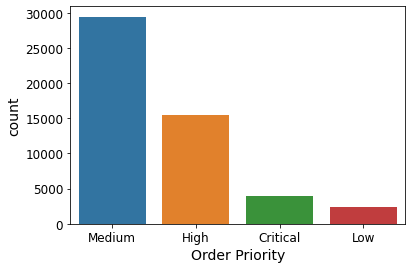

In [96]:
# Plotting a bar chart for the order priority
sns.countplot(data = df, x = 'Order Priority')

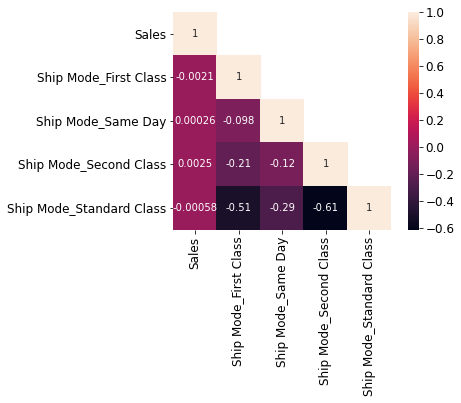

In [116]:
# To see the correlation between Shipmode and Sales
dfshipmode = df[['Ship Mode','Sales']]
df_sm = pd.get_dummies(dfshipmode)
cor_mat = df_sm.corr()
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True)

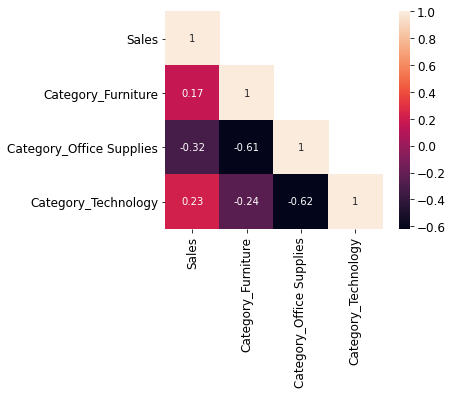

In [115]:
# To see the correlation between the Product category and Sales
dfcat = df[['Category','Sales']]
df_cat = pd.get_dummies(dfcat)
cor_mat = df_cat.corr()
sns.heatmap(data = cor_mat, mask = mask, square = True, annot = True, cbar = True)

## Part - B

### Sales Forecast

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [119]:
# Importing the csv file

In [2]:
df = pd.read_csv('Downloads/superstore_dataset2011-2015.csv', encoding= 'unicode_escape')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [216]:
df.shape

(51290, 24)

In [120]:
# Sort the values 
df.sort_values(by = ['Row ID'], inplace = True)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
14087,1,MX-2014-143658,2/10/2014,6/10/2014,Standard Class,SC-20575,Sonia Cooley,Consumer,Mexico City,Distrito Federal,...,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",13.08,3,0.0,4.56,1.03,Medium
24624,2,MX-2012-155047,15-10-2012,20-10-2012,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,...,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",252.16,8,0.0,90.72,13.45,Medium
24630,3,MX-2012-155047,15-10-2012,20-10-2012,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,...,FUR-BO-10002352,Furniture,Bookcases,"Ikea 3-Shelf Cabinet, Mobile",193.28,2,0.0,54.08,9.63,Medium
24657,4,MX-2012-155047,15-10-2012,20-10-2012,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,...,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",35.44,4,0.0,4.96,1.37,Medium
24644,5,MX-2012-155047,15-10-2012,20-10-2012,Standard Class,KW-16570,Kelly Williams,Consumer,Dos Quebradas,Risaralda,...,OFF-AR-10004594,Office Supplies,Art,"Sanford Canvas, Water Color",71.60,2,0.0,11.44,3.79,Medium


In [121]:
# Filtering only a subset of the data
furnitureDf = df[df['Category'] == 'Furniture']

In [219]:
## Data Pre-processing
## Keeping only the required columns - Order Date and Sales

In [122]:
col = [col for col in furnitureDf.columns if not (col == 'Order Date' or col == 'Sales')]
furnitureDf.drop(columns = col,axis = 1,inplace = True)
furnitureDf['Order Date'] = furnitureDf['Order Date'].str.replace('-','/')
furnitureDf.head()

,Order Date,Sales
24624,15/10/2012,252.160
24630,15/10/2012,193.280
9548,5/3/2013,210.640
42648,26/06/2013,308.280
31779,19/12/2013,273.472


In [123]:
# Convert the string format of the date column to timestamp
furnitureDf['Order Date'] = pd.to_datetime(furnitureDf['Order Date'],dayfirst = True)

In [127]:
# Clean the untidy data
furnitureDf.sort_values(by = ['Order Date'],inplace = True)
furnitureDf.isnull().sum() 

Order Date    0
Sales         0
dtype: int64

In [128]:
# Set the date column as the index
furnitureDf = furnitureDf.groupby('Order Date')['Sales'].sum().reset_index()
furnitureDf.set_index(['Order Date'],inplace = True)

In [129]:
# Aggregating the data year - wise
YearlyDf = furnitureDf['Sales'].resample('Y').sum()

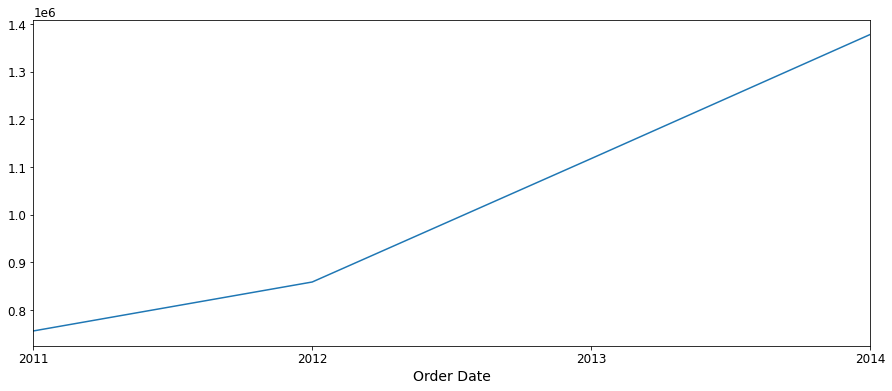

In [130]:
# Plotting the graph
YearlyDf.plot(figsize = (15,6))
plt.show()

In [131]:
# Aggregating the data month - wise
MonthlyDf = furnitureDf['Sales'].resample('MS').sum()
MonthlyDf.head(10)
type(MonthlyDf)

pandas.core.series.Series

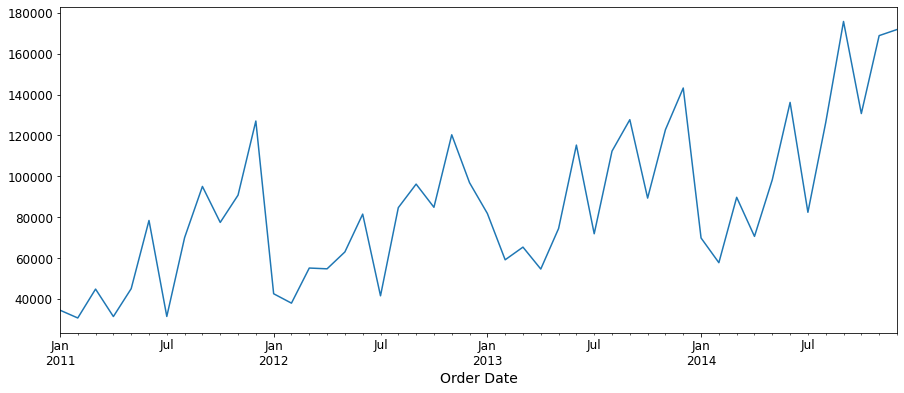

In [133]:
# Plotting the graph
MonthlyDf.plot(figsize = (15,6))
plt.show()

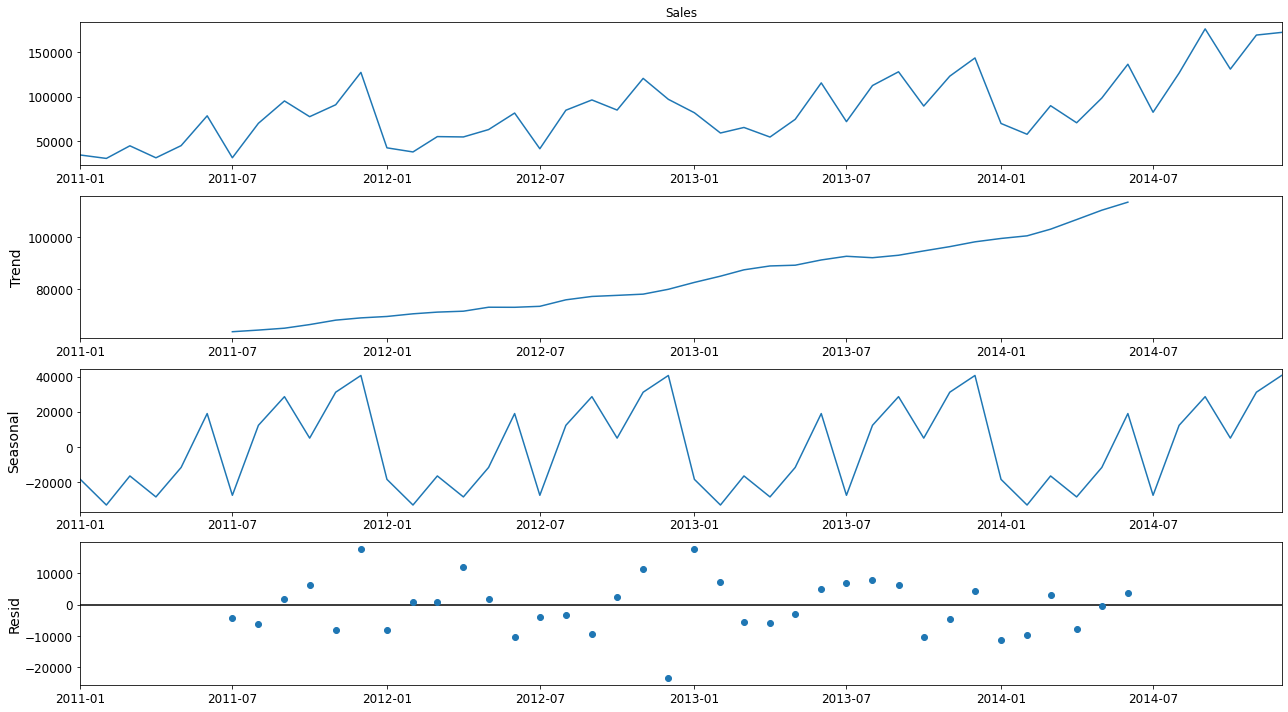

In [134]:
# Decomposition to see the trends and seasonality.
from pylab import rcParams
rcParams['figure.figsize'] = 18,10
decomp = sm.tsa.seasonal_decompose(MonthlyDf, model = 'Additive')
fig = decomp.plot()
plt.show()

In [16]:
## Quarterly sales across the years

In [137]:
QuarterlyDf = furnitureDf['Sales'].resample('Q').sum()
QuarterlyDf.head()

Order Date
2011-03-31    109885.0953
2011-06-30    154694.3855
2011-09-30    196398.7741
2011-12-31    295214.1291
2012-03-31    135479.0199
Freq: Q-DEC, Name: Sales, dtype: float64

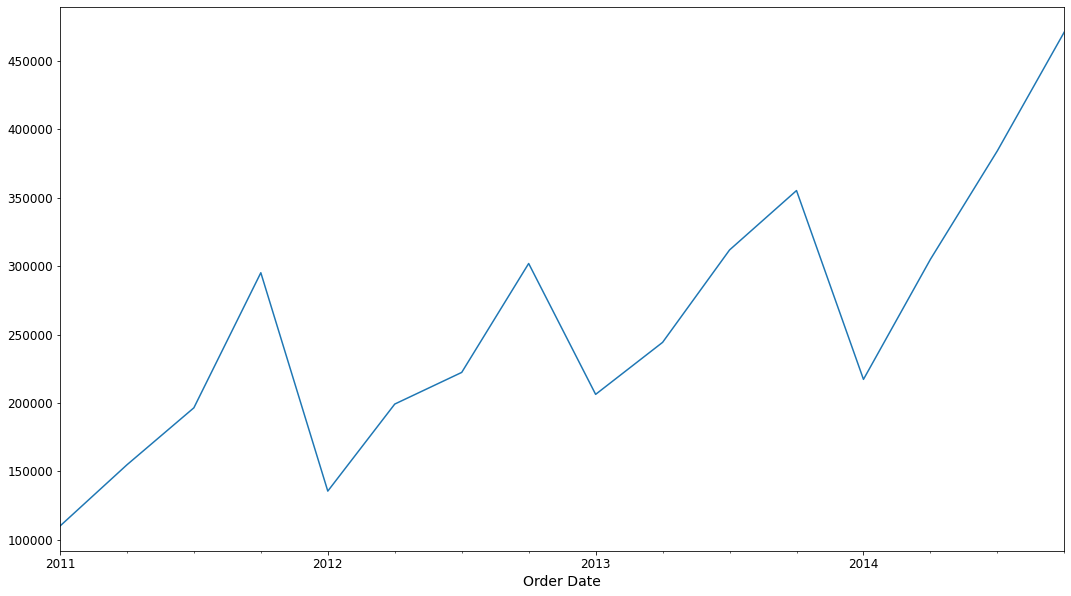

In [140]:
# Plotting Quarterly results
QuarterlyDf.plot()
plt.show()

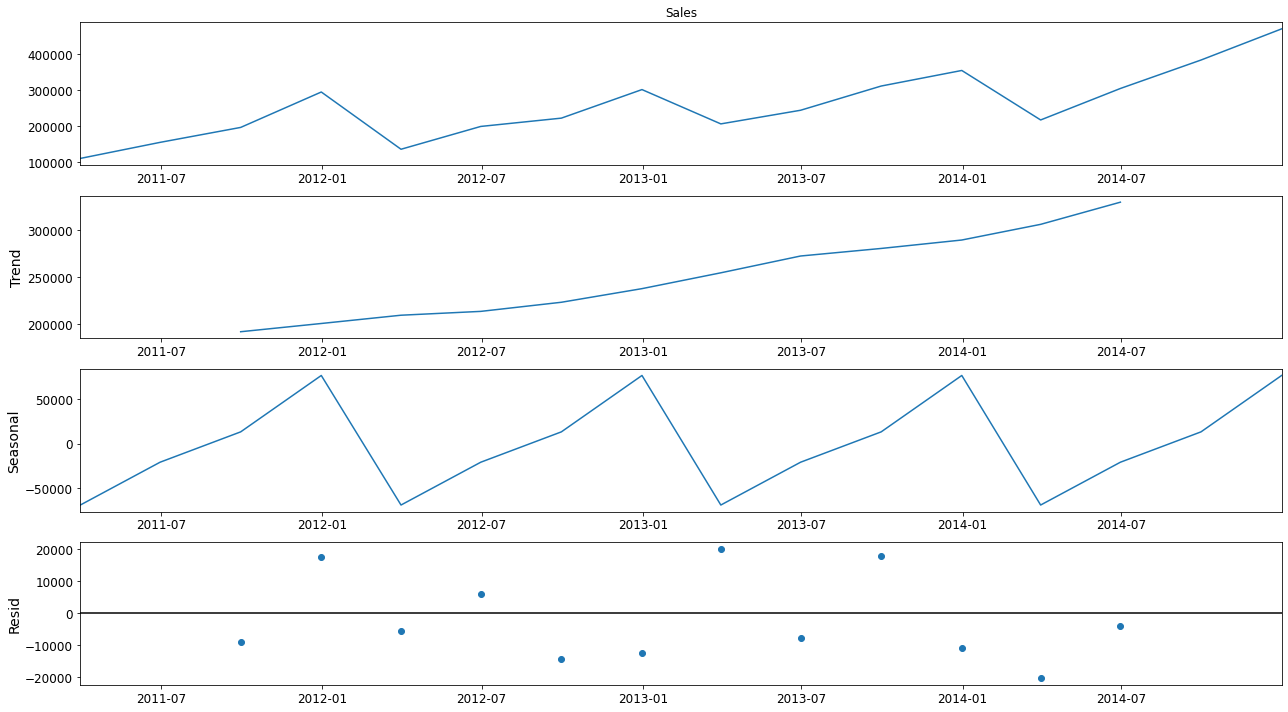

In [138]:
# Decomposition to see the trends and seasonality.
decompQ = sm.tsa.seasonal_decompose(QuarterlyDf, model = 'Additive')
figQ = decompQ.plot()
plt.show()

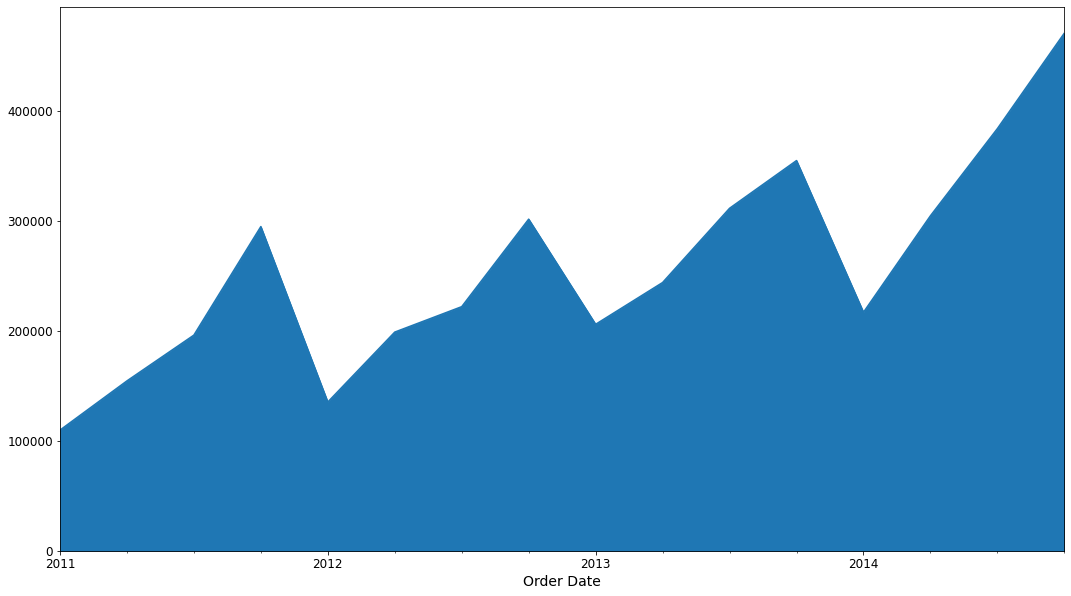

In [139]:
# Plotting Quarterly sales figures using area bar
QuarterlyDf.plot(kind = 'area')

In [34]:
# Parameters for the model
p = d = q =range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in pdq]

In [37]:
# To get the AIC - Akaike Information Criterion
for x in pdq:
    for y in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(MonthlyDf,order = x ,seasonal_order = y,enforce_invertibility= False,enforce_stationarity= False)
            results = mod.fit()
            print("SARIMA{}X{} - AIC:{}".format(x,y,results.aic))

SARIMA(0, 0, 0)X(0, 0, 0, 12)- AIC:1212.150494320523
SARIMA(0, 0, 0)X(0, 0, 1, 12)- AIC:62309.8055406837
SARIMA(0, 0, 0)X(0, 1, 0, 12)- AIC:808.3719888935643
SARIMA(0, 0, 0)X(0, 1, 1, 12)- AIC:550.0326330710138
SARIMA(0, 0, 0)X(1, 0, 0, 12)- AIC:808.3473645173284
SARIMA(0, 0, 0)X(1, 0, 1, 12)- AIC:779.4763651506851
SARIMA(0, 0, 0)X(1, 1, 0, 12)- AIC:558.8195644706309
SARIMA(0, 0, 0)X(1, 1, 1, 12)- AIC:517.4241487421571
SARIMA(0, 0, 1)X(0, 0, 0, 12)- AIC:1161.1329995655744
SARIMA(0, 0, 1)X(0, 0, 1, 12)- AIC:58508.48778591511
SARIMA(0, 0, 1)X(0, 1, 0, 12)- AIC:782.0526361349371
SARIMA(0, 0, 1)X(0, 1, 1, 12)- AIC:508.0759465803682
SARIMA(0, 0, 1)X(1, 0, 0, 12)- AIC:899.5069401662166
SARIMA(0, 0, 1)X(1, 0, 1, 12)- AIC:851.5920530646937
SARIMA(0, 0, 1)X(1, 1, 0, 12)- AIC:548.549733419693
SARIMA(0, 0, 1)X(1, 1, 1, 12)- AIC:507.8345659079754
SARIMA(0, 1, 0)X(0, 0, 0, 12)- AIC:1090.450823845118
SARIMA(0, 1, 0)X(0, 0, 1, 12)- AIC:1405.8568666556325
SARIMA(0, 1, 0)X(0, 1, 0, 12)- AIC:784.2886300

In [82]:
# Summary Statistics
mod = sm.tsa.statespace.SARIMAX(MonthlyDf,order = (1,1,1) ,seasonal_order = (1,1,1,12),
                                enforce_invertibility= False,enforce_stationarity= False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0868      1.325      0.065      0.948      -2.511       2.685
ma.L1         -0.5501      0.994     -0.553      0.580      -2.499       1.399
ar.S.L12      -0.6378      0.409     -1.559      0.119      -1.440       0.164
ma.S.L12       0.0344      0.753      0.046      0.964      -1.442       1.511
sigma2      3.527e+08   2.85e-09   1.24e+17      0.000    3.53e+08    3.53e+08


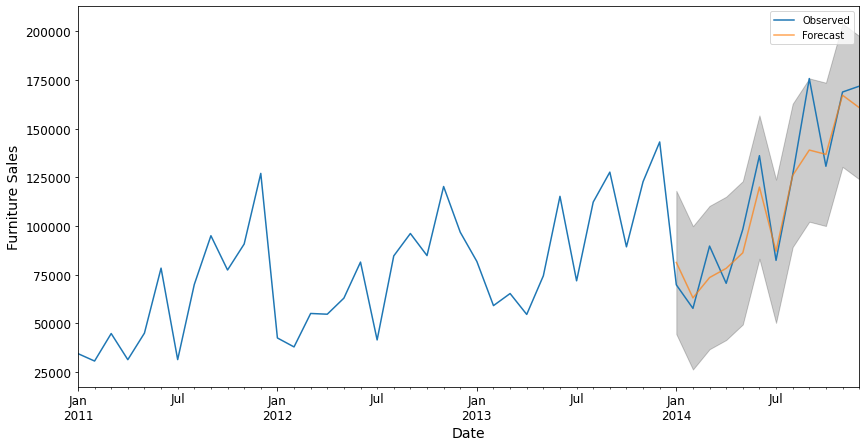

In [141]:
# Forecast for the year 2014
pred = results.get_prediction(start = pd.to_datetime('2014-01-01'),dynamic = False)
pred_ci = pred.conf_int()
ax = MonthlyDf['2011':].plot(label = 'Observed')
pred.predicted_mean.plot(ax= ax,label = 'Forecast',alpha = 0.7,figsize = (14,7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],color = 'k',alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel("Furniture Sales")
plt.legend()
plt.show()


In [142]:
# Finding the mean square error of the predicted model.
MonthlyDf_forecasted = pred.predicted_mean
MonthlyDf_truth = MonthlyDf['2014-01-01':]
mse = ((MonthlyDf_forecasted - MonthlyDf_truth)**2).mean()
print('The mean squared error of forecast is {}'.format(round(mse,2)))
print('Root mean squared error of forecast is {}'.format(round(np.sqrt(mse),2)))

The mean squared error of forecast is 201708864.67
Root mean squared error of forecast is 14202.42


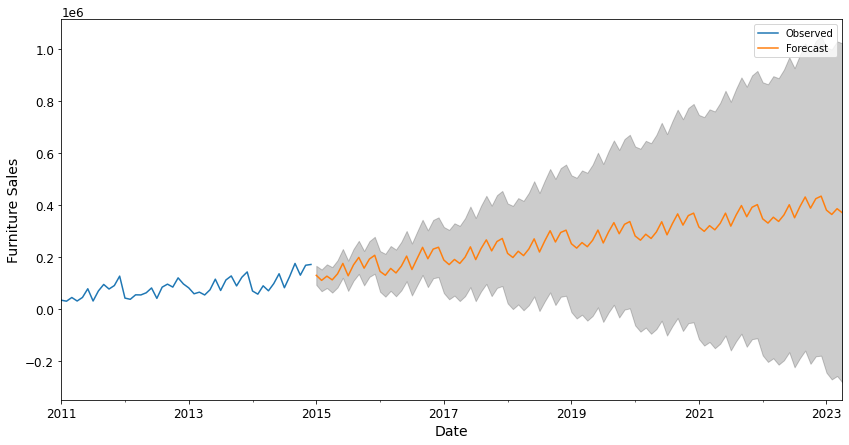

In [143]:
# A forecast for the 10 years down the line
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()
ax = MonthlyDf.plot(label = 'Observed',figsize = (14,7))
pred_uc.predicted_mean.plot(ax= ax,label = 'Forecast')
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],color = 'k',alpha = 0.2)
ax.set_xlabel("Date")
ax.set_ylabel("Furniture Sales")
plt.legend()
plt.show()